In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy import stats
import random

np.random.seed(42)
random.seed(42)



## Import and prepare data:

In [48]:
# import natural SH3 homologs
nat_df = pd.read_excel('.././data/LibraryNatural.xls')
nat_mmd_df = pd.read_excel('./data/20210908_natural_with_taxonomy.xls')

In [49]:
final_nat_mmd_df = nat_mmd_df.dropna(subset = ['norm_RE'])

In [50]:
nat_mmd_df.shape[0], final_nat_mmd_df.shape[0]

(7865, 6447)

In [51]:
def unnorm_re(norm_re):
    return (norm_re - 1) / 0.4419267635641193

def norm_re(unnorm_re):
    return unnorm_re * 0.4419267635641193 + 1


# unnormalize natural r.e.
RE_unnorm = np.array( [ unnorm_re(nat_re) for nat_re in nat_mmd_df.norm_RE.values] )

# normalize natural r.e.
RE_norm = nat_mmd_df.norm_RE.values

Text(0, 0.5, 'Counts')

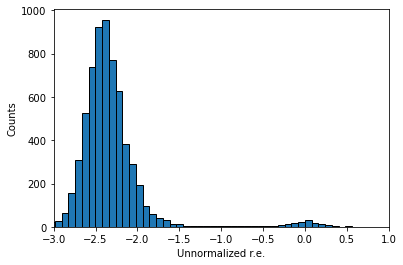

In [52]:
plt.hist(RE_unnorm, bins = 50, edgecolor = 'k')
plt.xlim([-3, 1])

plt.xlabel('Unnormalized r.e.')
plt.ylabel('Counts')


#### Fit Gaussian distributions:

In [68]:
norm_re( -2 ), norm_re( -0.4 )

(0.11614647287176139, 0.8232292945743522)

In [53]:
# nonfunctional mode: 
nonfunc_RE_norm = RE_norm[ RE_norm < norm_re( -2 ) ]

# functional mode:
func_RE_norm = RE_norm[ RE_norm > norm_re( -0.4 ) ]


In [54]:
# nonfunctional gaussian mode ...
gm_nonfunc = GaussianMixture(n_components=1, random_state=42).fit(nonfunc_RE_norm.reshape(-1,1))

# functional gaussian mode ...
gm_func = GaussianMixture(n_components=1, random_state=42).fit(func_RE_norm.reshape(-1,1))


In [55]:
# nonfunctional guassian mean and std 
nonfunc_std = gm_nonfunc.covariances_[0][0] ** (1/2)
nonfunc_mean = gm_nonfunc.means_[0]


# functional guassian mean and std 
func_std = gm_func.covariances_[0][0] ** (1/2)
func_mean = gm_func.means_[0]



In [56]:
print('Nonfunctional mean and standard deviation:', nonfunc_mean, nonfunc_std)
print('Functional mean and standard deviation:', func_mean, func_std)

print('Lower bound for partial rescuing sequences:', nonfunc_mean + 2 * nonfunc_std)
print('Upper bound for partial rescuing sequences:', func_mean - 2 * func_std)

Nonfunctional mean and standard deviation: [-0.06689762] [0.08802259]
Functional mean and standard deviation: [1.00495329] [0.08168199]
Lower bound for partial rescuing sequences: [0.10914757]
Upper bound for partial rescuing sequences: [0.84158931]


Text(0, 0.5, 'Counts')

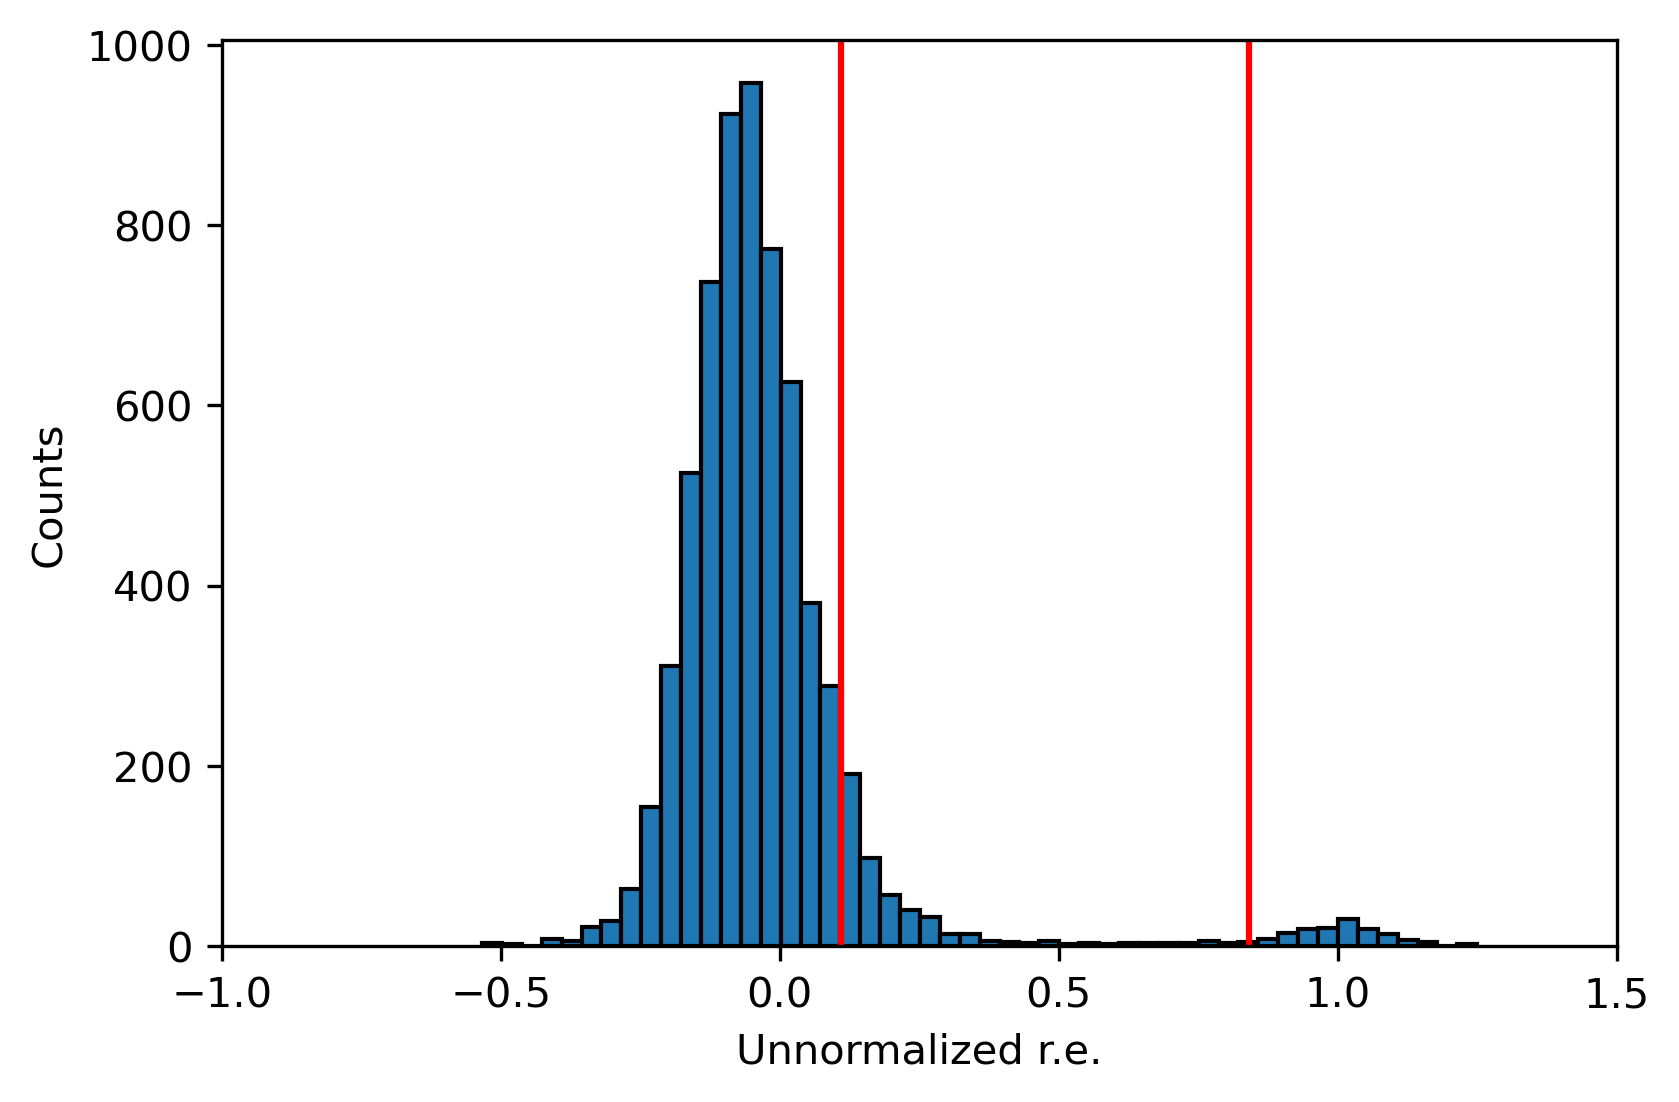

In [57]:
plt.figure(dpi = 300)
plt.hist(RE_norm, bins = 50, edgecolor = 'k')

# only one line may be specified; full height
plt.axvline(x = nonfunc_mean + 2 * nonfunc_std, color = 'r')
plt.axvline(x = func_mean - 2 * func_std, color = 'r')

plt.xlim([-1, 1.5])

plt.xlabel('Unnormalized r.e.')
plt.ylabel('Counts')


## MMD embeddings:

In [58]:
# introduce unnormalized r.e. column: 
nat_mmd_df['unnorm_re'] = RE_unnorm

In [59]:
# drop all rows with missing r.e. scores: 
final_nat_mmd_df = nat_mmd_df.dropna(subset = ['unnorm_re'])
final_nat_mmd_df.head() # show the first five rows ...

Unnamed: 0  seq source ShortName                         DomainName  \
0           0    0    jgi    Torde1  TDEL_0F02380_domain_number[1],jgi   
1           1    1    jgi    Torde1  TDEL_0F02380_domain_number[2],jgi   
2           2    2    jgi    Torde1  TDEL_0F02380_domain_number[3],jgi   
3           3    3    jgi    Torde1  TDEL_0B05220_domain_number[1],jgi   
4           4    4    jgi    Torde1  TDEL_0B05220_domain_number[2],jgi   

   TranscriptID                                       Protein  DomainNo  \
0        3708.0  Equilibrative nucleoside transporter protein         1   
1        3708.0  Equilibrative nucleoside transporter protein         2   
2        3708.0  Equilibrative nucleoside transporter protein         3   
3        1310.0                Cdc42-interacting protein CIP4         1   
4        1310.0                Cdc42-interacting protein CIP4         2   

       ID                  Species  ...  \
0  4950.0  Torulaspora delbrueckii  ...   
1  4950.0  Torulaspora delbrueckii  ...   
2  4950.0  Torulaspora delbrueckii  ...   
3  4950.0  Torulaspora delbrueckii  ...   
4  4950.0  Torulaspora delbrueckii  ...   

                                           Sequences  \
0  VFLGVYKALYDYEPQTTEELAIREDELLYLLEKSDEWWTVKKDEPV...   
1  PVINSVRALYDYDQNPDEELTFHENEEFDVYDDQDDWLLVQKTGAC...   
2  KARKEGKVLYDFIAESQDELSVKQGQTVYILNDKKDWWMCELSGQK...   
3  TGSNKNKVLFAYSKQDADEVSISLRDLVALEAADGGWTKIKNTGET...   
4  MPTRTMQAQYDYEAQGDDELSLTPNDVVNVIRGDDGWTYGE-NGEK...   

                                 Sequences_unaligned    MMD_z0    MMD_z1  \
0  TVFLGVYKALYDYEPQTTEELAIREDELLYLLEKSDVDEWWTVKKR... -0.212743  0.560967   
1  APVINSVRALYDYDQAQNPDEELTFHENEEFDVYDDQDPDWLLVQQ... -0.133021  1.238067   
2  SKARKEGKVLYDFIAESQDELSVKQGQTVYILNDKKSRDWWMCELV... -1.025860  0.236221   
3  GTGSNKNKVLFAYSKQDADEVSISLRDLVALEAADTGSGWTKIKNL... -0.778632 -0.124500   
4  NMPTRTMQAQYDYEAQGDDELSLTPNDVVNVIRGDDGSGWTYGELN... -0.155759 -0.226678   

     MMD_z2                                       header_twist   norm_RE  \
0 -0.190477  4837_jgi||3708||Equilibrative nucleoside trans...  0.148125   
1 -0.209800  2997_jgi||3708||Equilibrative nucleoside trans...  0.076445   
2 -0.425561  4599_jgi||3708||Equilibrative nucleoside trans... -0.175593   
3 -0.325014  5418_jgi||1310||Cdc42-interacting protein CIP4...  0.119790   
4 -0.148836  4838_jgi||1310||Cdc42-interacting protein CIP4... -0.255056   

   orthologous_group    PhyGroup unnorm_re  
0        NOG257967_1  Ascomycota -1.927638  
1        NOG257967_2  Ascomycota -2.089836  
2        NOG257967_3  Ascomycota -2.660154  
3          KOG3565_1  Ascomycota -1.991756  
4          KOG3565_2  Ascomycota -2.839965  

[5 rows x 21 columns]

#### Analyze fully-rescued homologs:

In [60]:
# define fully rescuing sequences: 
fully_res_homologs_df = final_nat_mmd_df[final_nat_mmd_df['norm_RE'].values > func_mean - 2 * func_std]
print('Number of fully rescuing homologs:', fully_res_homologs_df.shape[0])

# check how many fully-rescued orthologs are fully rescuing:
num_sho1_fully = np.sum(fully_res_homologs_df['orthologous_group'] == 'NOG09120')
print('Number of known annotated sho1 fully rescuing homologs:', num_sho1_fully)

# number of unknown annotations but fully rescue:
fully_res_unknown_df = fully_res_homologs_df[~(fully_res_homologs_df['orthologous_group'] == 'NOG09120')]
num_unknown_annot_fully = fully_res_unknown_df.shape[0]

print('Number of unknown annotation that sho1 fully rescuing homologs:', num_unknown_annot_fully)



Number of fully rescuing homologs: 141
Number of known annotated sho1 fully rescuing homologs: 135
Number of unknown annotation that sho1 fully rescuing homologs: 6


#### Analyze nonfully-rescued homologs:

In [61]:
# define nonfully rescuing sequences: 
nonfully_res_homologs_df = final_nat_mmd_df[final_nat_mmd_df['norm_RE'].values < nonfunc_mean + 2 * nonfunc_std]
print('Number of non-fully rescuing homologs:', nonfully_res_homologs_df.shape[0])

# check how many nonfully-rescued orthologs are fully rescuing:
num_sho1_nonfully = np.sum(nonfully_res_homologs_df['orthologous_group'] == 'NOG09120')
print('Number of known annotated sho1 nonfully rescuing homologs:', num_sho1_nonfully)



Number of non-fully rescuing homologs: 5808
Number of known annotated sho1 nonfully rescuing homologs: 7


#### Analyze partial-rescued homologs:

In [62]:
# define partial rescuing sequences: 
partial_res_homologs_df = final_nat_mmd_df[
    (final_nat_mmd_df['norm_RE'].values > nonfunc_mean + 2 * nonfunc_std) \
& (final_nat_mmd_df['norm_RE'].values < func_mean - 2 * func_std)
                ]

In [63]:
# number of partial rescuing sequences:
num_partial_res = partial_res_homologs_df.shape[0]

print('Number of partially rescued homologs:', num_partial_res)

num_partial_sho1 = partial_res_homologs_df[partial_res_homologs_df['orthologous_group'] == 'NOG09120' ].shape[0]

print('Number of partially rescued Sho1 orthologs:', num_partial_sho1)
print('Number of partially rescued Paralog:', num_partial_res - num_partial_sho1)


Number of partially rescued homologs: 498
Number of partially rescued Sho1 orthologs: 26
Number of partially rescued Paralog: 472


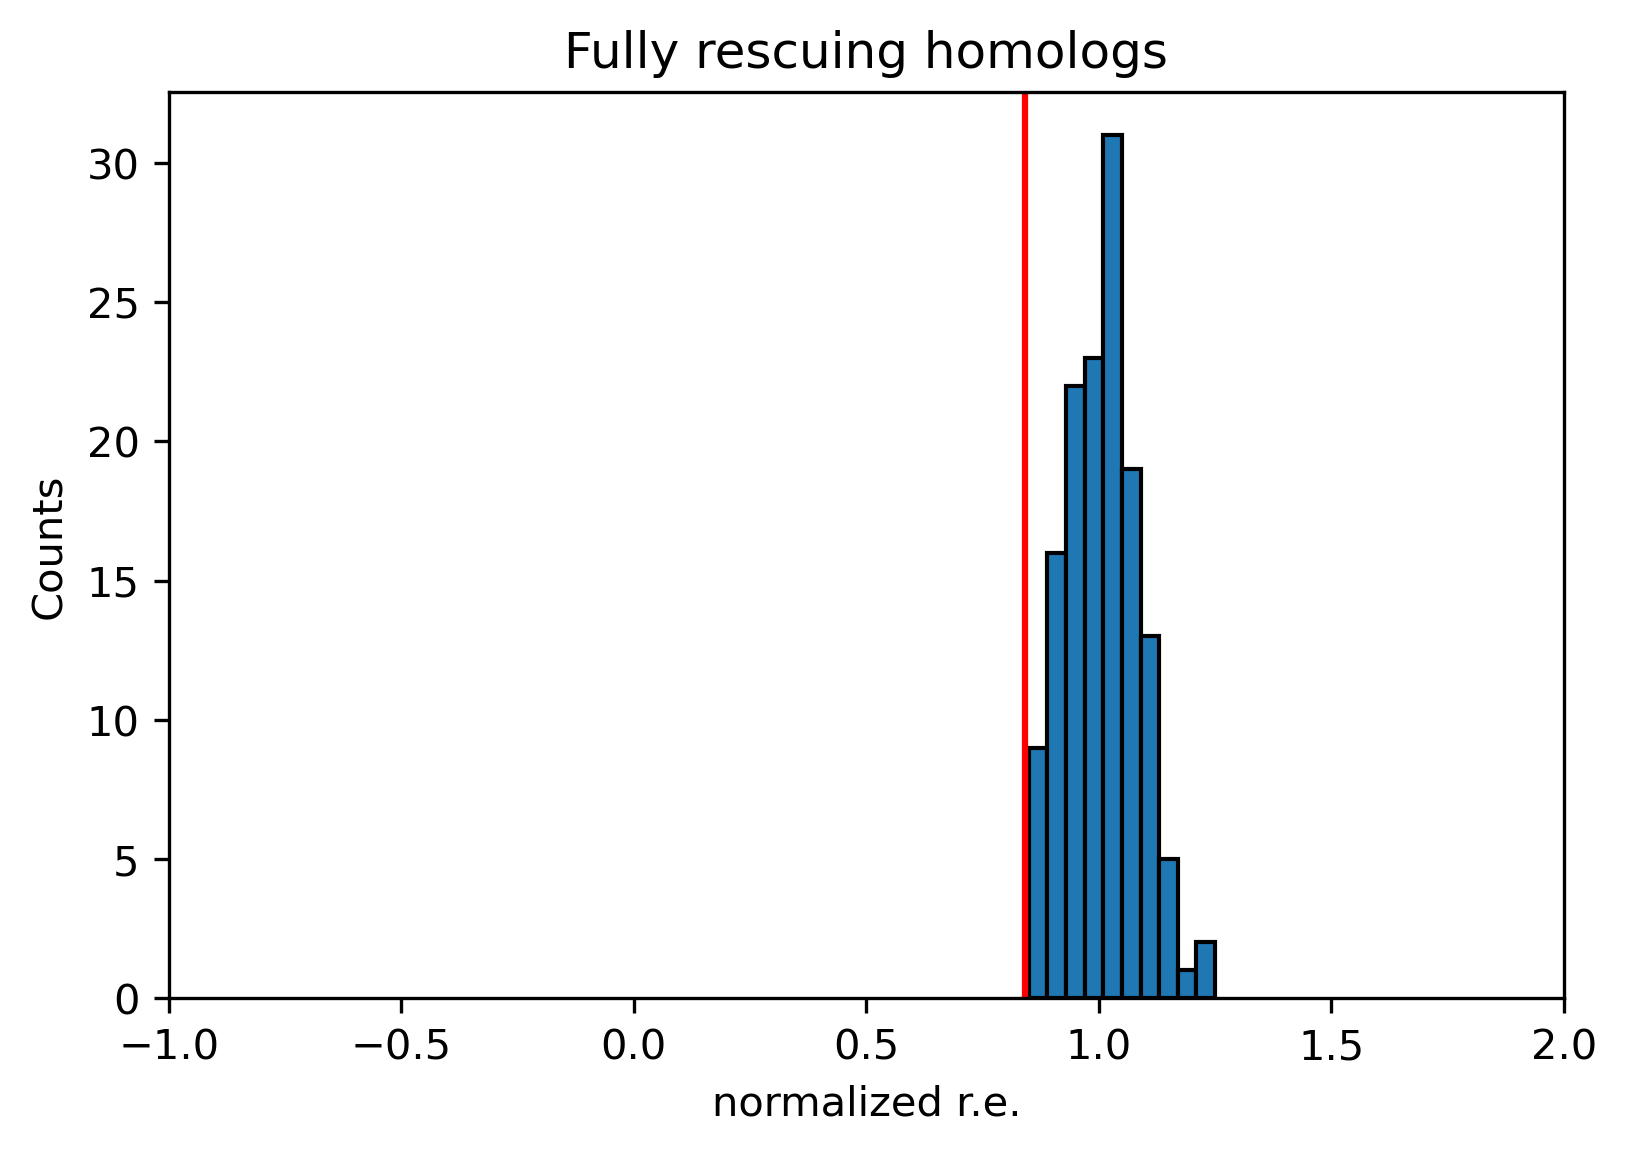

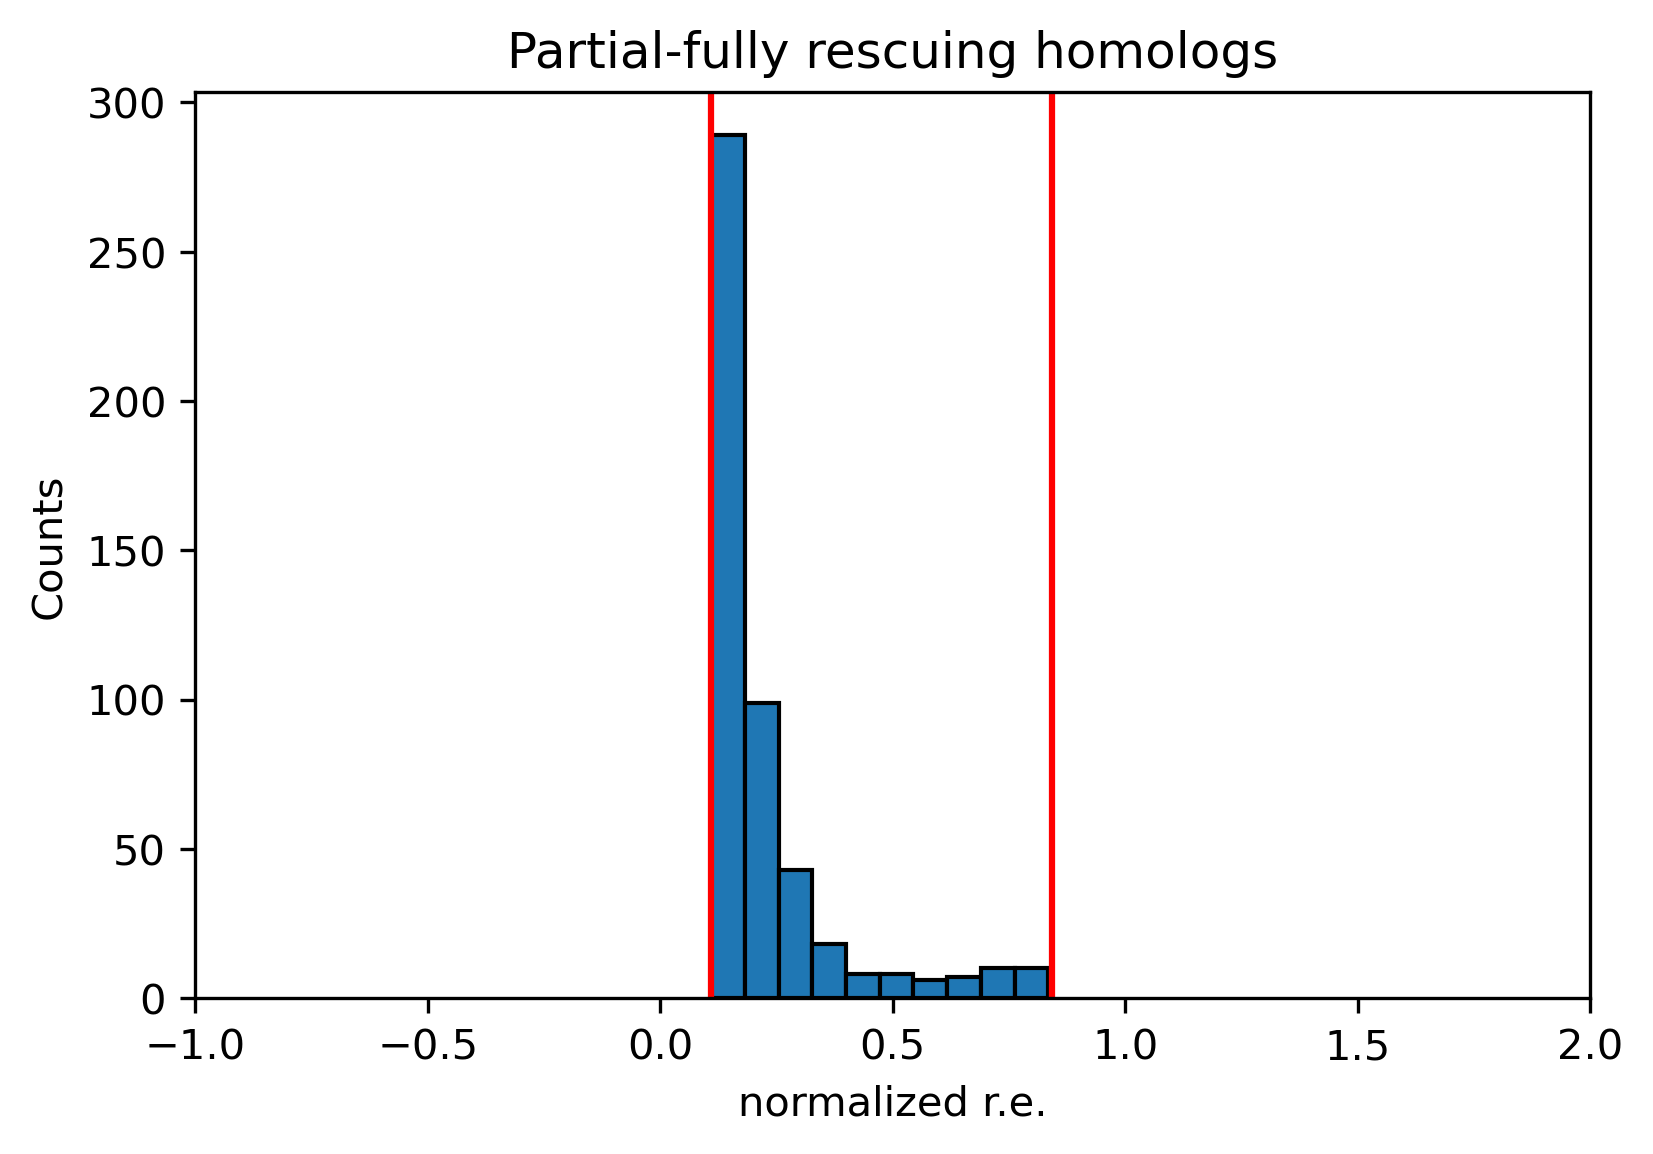

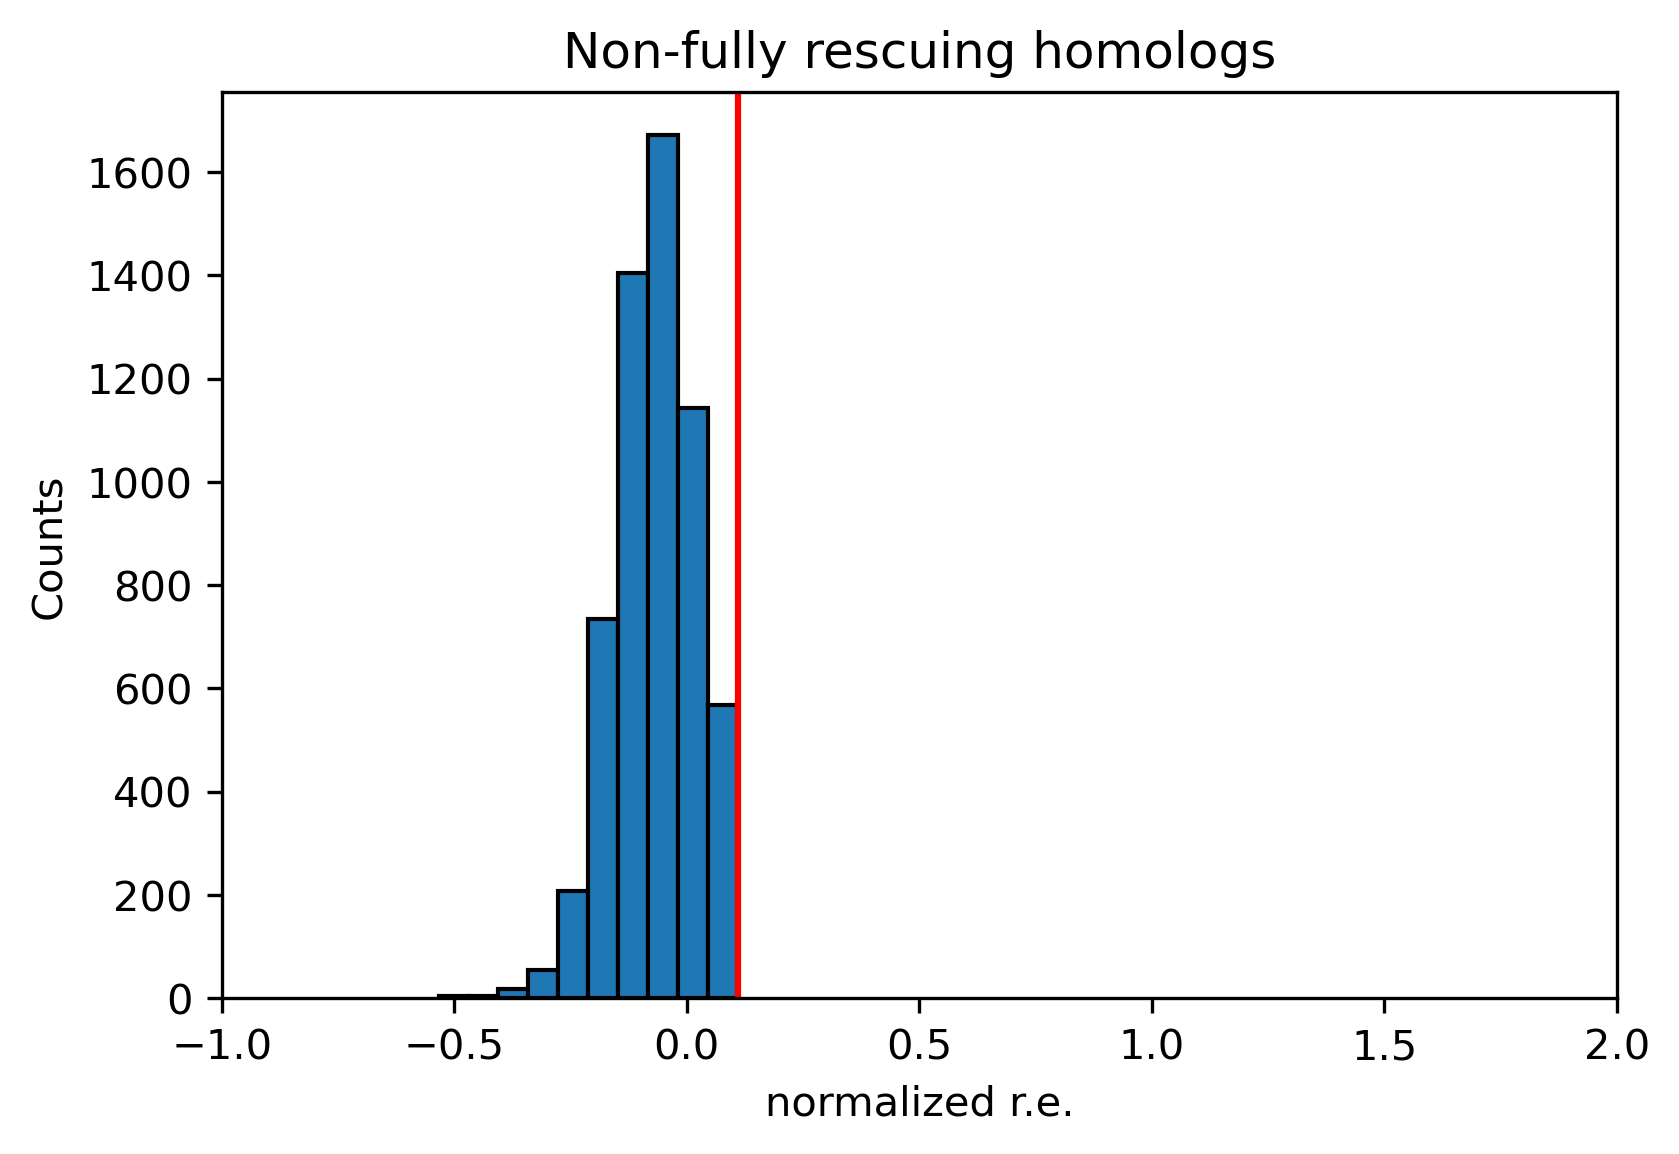

In [64]:
plt.figure(dpi = 300)
plt.hist(fully_res_homologs_df.norm_RE, edgecolor = 'k')
# only one line may be specified; full height
plt.axvline(x = func_mean - 2 * func_std, color = 'r')
plt.xlim([-1, 2])
plt.title('Fully rescuing homologs')
plt.xlabel('normalized r.e.')
plt.ylabel('Counts')

plt.show()

plt.figure(dpi = 300)
plt.hist(partial_res_homologs_df.norm_RE, edgecolor = 'k')
plt.axvline(x = nonfunc_mean + 2 * nonfunc_std, color = 'r')
plt.axvline(x = func_mean - 2 * func_std, color = 'r')
plt.xlim([-1, 2])
plt.title('Partial-fully rescuing homologs')
plt.xlabel('normalized r.e.')
plt.ylabel('Counts')

plt.show()


plt.figure(dpi = 300)
plt.hist(nonfully_res_homologs_df.norm_RE, edgecolor = 'k')
plt.axvline(x = nonfunc_mean + 2 * nonfunc_std, color = 'r')
plt.xlim([-1, 2])
plt.title('Non-fully rescuing homologs')
plt.xlabel('normalized r.e.')
plt.ylabel('Counts')

plt.show()



## Plot embeddings:

In [65]:
nonfully_res_z = nonfully_res_homologs_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values
partial_res_z = partial_res_homologs_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values
fully_res_z = fully_res_homologs_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values


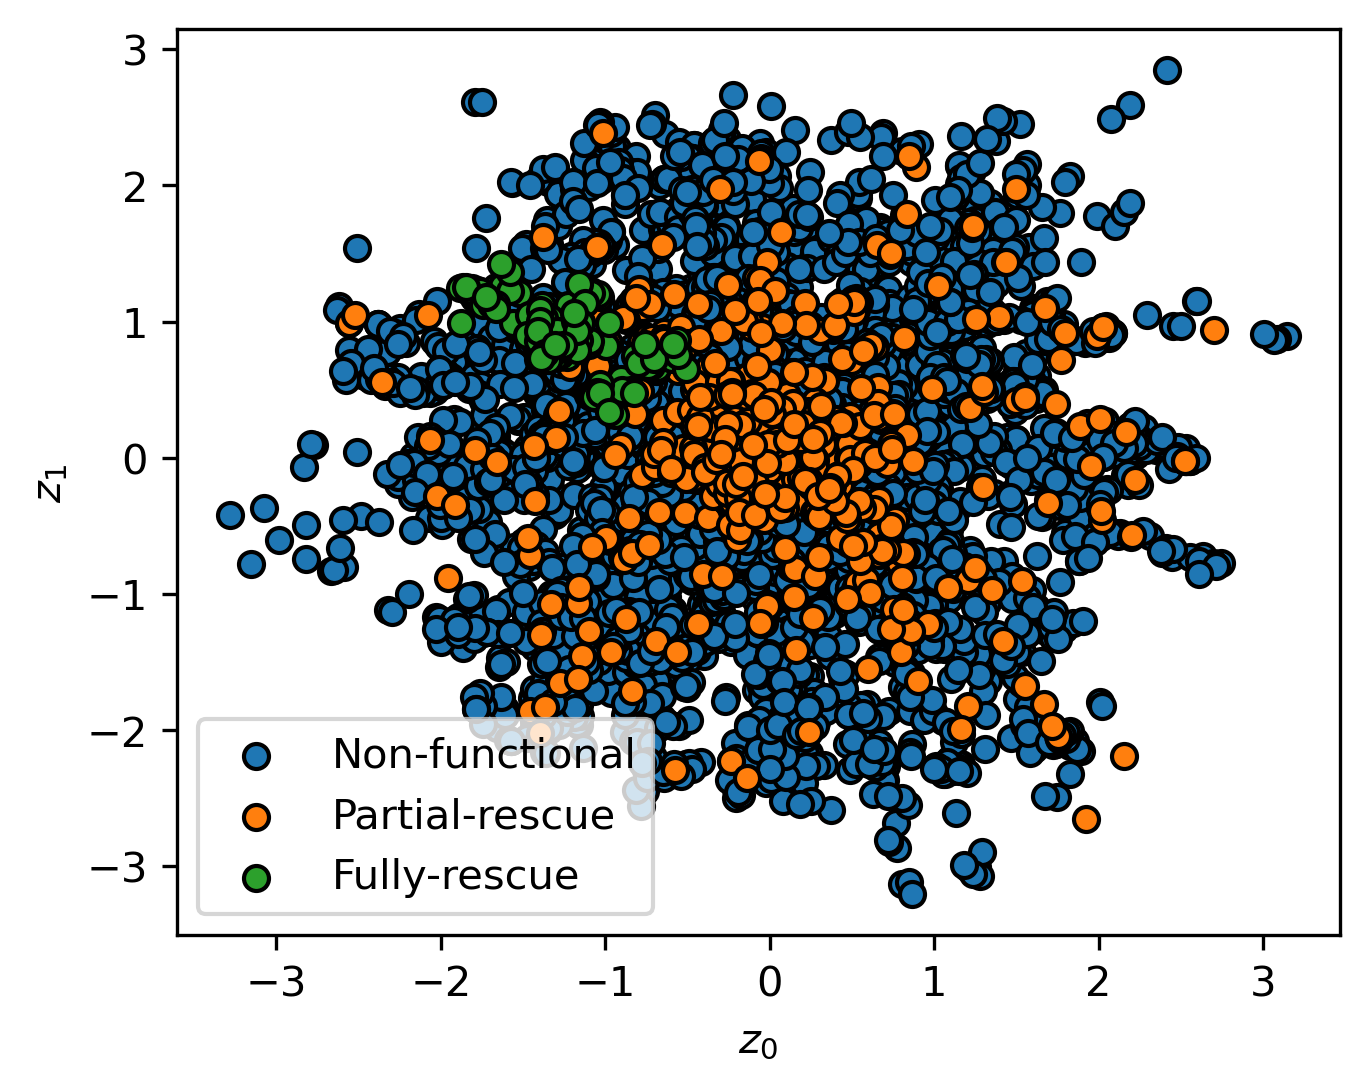

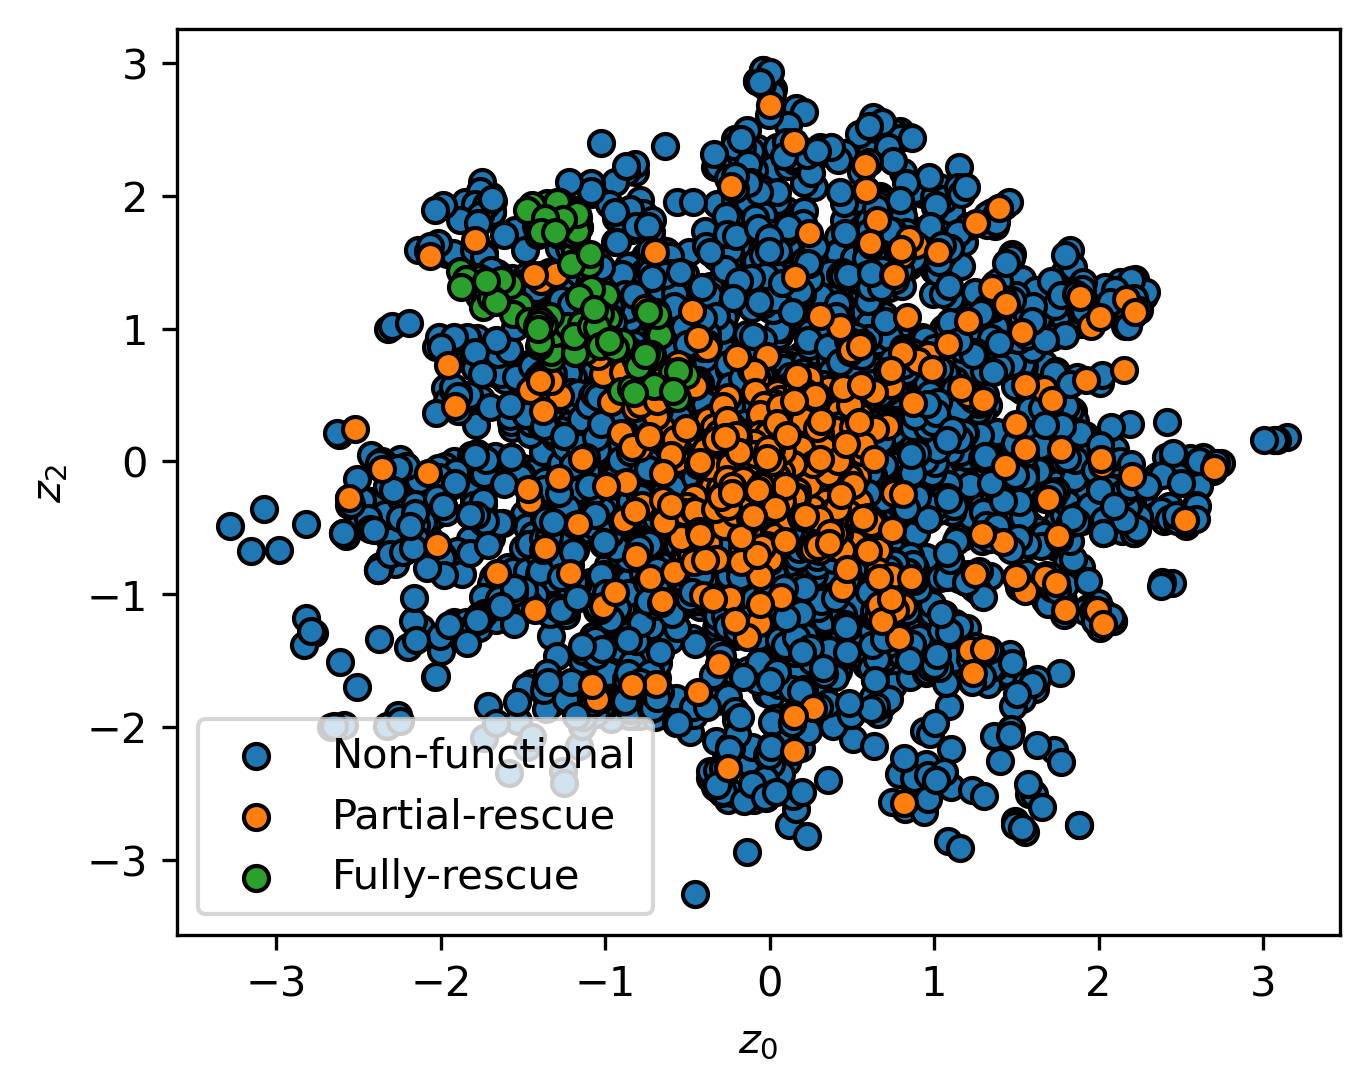

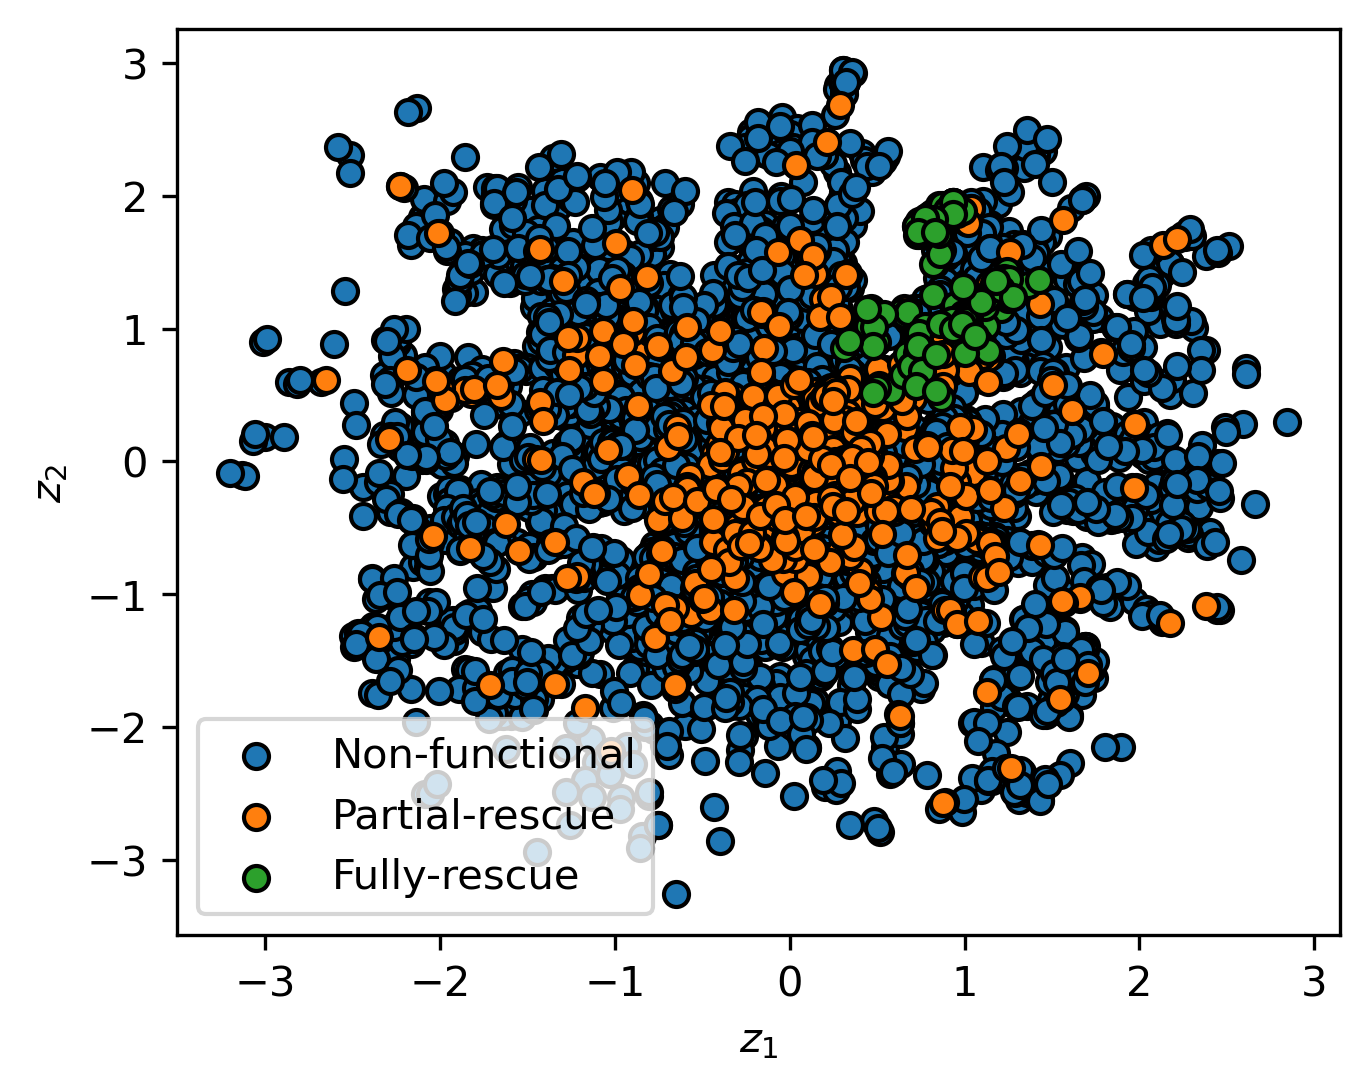

In [66]:
plt.figure(dpi = 300, figsize = (5,4))
plt.scatter(nonfully_res_z[:,0], nonfully_res_z[:,1], edgecolor = 'k', label = 'Non-functional')
plt.scatter(partial_res_z[:,0], partial_res_z[:,1], edgecolor = 'k', label = 'Partial-rescue')
plt.scatter(fully_res_z[:,0], fully_res_z[:,1], edgecolor = 'k', label = 'Fully-rescue')
plt.xlabel('$z_0$')
plt.ylabel('$z_1$')
plt.legend()
plt.show()

plt.figure(dpi = 300, figsize = (5,4))
plt.scatter(nonfully_res_z[:,0], nonfully_res_z[:,2], edgecolor = 'k', label = 'Non-functional')
plt.scatter(partial_res_z[:,0], partial_res_z[:,2], edgecolor = 'k', label = 'Partial-rescue')
plt.scatter(fully_res_z[:,0], fully_res_z[:,2], edgecolor = 'k', label = 'Fully-rescue')
plt.xlabel('$z_0$')
plt.ylabel('$z_2$')
plt.legend()
plt.show()

plt.figure(dpi = 300, figsize = (5,4))
plt.scatter(nonfully_res_z[:,1], nonfully_res_z[:,2], edgecolor = 'k', label = 'Non-functional')
plt.scatter(partial_res_z[:,1], partial_res_z[:,2], edgecolor = 'k', label = 'Partial-rescue')
plt.scatter(fully_res_z[:,1], fully_res_z[:,2], edgecolor = 'k', label = 'Fully-rescue')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.legend()
plt.show()



# Save spreadsheet:

In [220]:

# output dataframe with mmd embeddings.
output_nat_df = nat_mmd_df.iloc[:, 2:]
output_nat_df.to_excel('./NaturalLibrary_with_latent_codes.xls', index = False)

<ipython-input-220-b388bfec8e5e>:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  output_nat_df.to_excel('./NaturalLibrary_with_latent_codes.xls', index = False)
